<a href="https://colab.research.google.com/github/Shibli-Nomani/Telco-Project-With-ML/blob/main/project_03_p1_telco_marketbasket_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

Dataset which is using to perform **MARKET Basket Analysis** is purely imaginary to demonstate the purpose. Users are from different states of USA and using different Mobile Operators. 4G has internet whereas 3G has no internet package....

Apriori Algorithm is used for **MARKET Basket Analysis** and measeres associates based on 3 parameters
1. Support : frequecy of the item we have bought and combination of item we have bought. and filter out the less frequent items
2. Confidence: Say for number of times A and B items buy together. And C is not buying toggether, we can out it from combination. We can define the minimum support and confidence and put the values in Algorithm as well as filter out the data. Depending on this we can make rules to calculate.
3. Lift: Independent Occurance of A and B. Find out the best from different set of combinational rules.

**Goals**
I have prepared a dateset of multiple telco operators with their different packages(Internet, Talktime, SMS) and some are using pay per use. We will find the perfect combination comparing the all packages and others to generate a perfect packages for customers.

**Apriori Algorithms**
Uses the frequently item sets to generate association rules.Frequent Item set has greater support value than the threshold. For example, A and B is a combinational frequent item sets. They are also frequent item individually. 



In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [262]:
path='/content/gdrive/MyDrive/DataScience-Telco-Project/telcom_operators_revenue.csv'
df = pd.read_csv(path)
df.head(5)

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
0,D001,Bob,M,USA,California,ATT,February-22,36002,50.0,20.0,Netflix,ATT-TRIO,4G,45
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,NaN,NaN,4G,20
2,D003,Patricia,F,USA,Florida,TMobile USA,February-22,43207,36.0,15.0,Netflix,T Esential,4G,30
3,D004,Alex,M,USA,New York,US Cellular,February-22,40320,45.0,15.0,Netflix,US Ready Connect Pro,4G,40
4,D005,Jennifer,F,USA,Florida,Verizon,February-22,42126,100.0,15.0,Netflix and Disney,V Star Unlimited,4G,35


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    169 non-null    object 
 1   Customer_name  169 non-null    object 
 2   Gender         169 non-null    object 
 3   Country        169 non-null    object 
 4   State          169 non-null    object 
 5   operator_name  169 non-null    object 
 6   Month          169 non-null    object 
 7   Call_Duration  169 non-null    int64  
 8   SMS            169 non-null    float64
 9   Internet_GB    167 non-null    float64
 10  OTT_service    108 non-null    object 
 11  package_name   114 non-null    object 
 12  SIM_state      169 non-null    object 
 13  total_cost     169 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 18.6+ KB


**Missing Value Treatment**

In [264]:
#Handling Missing Value
missing_value=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(40)

,missing,percent
OTT_service,61,36.094675
package_name,55,32.544379
Internet_GB,2,1.183432
customer_id,0,0.000000
Customer_name,0,0.000000
Gender,0,0.000000
Country,0,0.000000
State,0,0.000000
operator_name,0,0.000000
Month,0,0.000000


**Missing Values for OTT_service**

In [265]:
df['OTT_service'].value_counts()

Netflix                          35
Netflix and Amazon Prime         35
Amazon Prime                     16
Netflix and Disney               10
Netflix Hulu and Amazon Prime     8
Disney and Hulu                   4
Name: OTT_service, dtype: int64

In [266]:
df[(pd.notnull(df['OTT_service'])) & (df['SIM_state'] == '3G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost


In [267]:
df[(pd.notnull(df['OTT_service'])) & (df['SIM_state'] == '4G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
0,D001,Bob,M,USA,California,ATT,February-22,36002,50.0,20.0,Netflix,ATT-TRIO,4G,45
2,D003,Patricia,F,USA,Florida,TMobile USA,February-22,43207,36.0,15.0,Netflix,T Esential,4G,30
3,D004,Alex,M,USA,New York,US Cellular,February-22,40320,45.0,15.0,Netflix,US Ready Connect Pro,4G,40
4,D005,Jennifer,F,USA,Florida,Verizon,February-22,42126,100.0,15.0,Netflix and Disney,V Star Unlimited,4G,35
5,D006,Mark,M,USA,Chicago,Verizon,February-22,62406,150.0,25.0,Netflix and Amazon Prime,V Get More Unlimited,4G,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,D037,Alan,M,USA,Texas,Verizon,May-22,53294,73.0,26.0,Netflix and Amazon Prime,V Get More Unlimited,4G,55
164,D039,Alice,F,USA,Texas,ATT,May-22,47478,36.0,20.0,Netflix,ATT-Basic,4G,32
165,D040,Judy,F,USA,Texas,ATT,May-22,57605,60.0,32.0,Netflix and Amazon Prime,ATT_Unlimited,4G,60
167,D042,Laura,F,USA,Colorado,Verizon,May-22,40903,39.0,22.0,Netflix,V Star Unlimited,4G,35


In [268]:
#Find missing value of specific column
df[df['OTT_service'].isnull()]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,NaN,NaN,4G,20
7,D008,Sandra,F,USA,Georgia,US Cellular,February-22,34560,100.0,10.0,NaN,US Basic,4G,35
8,D009,Steven,M,USA,New York,Verizon,February-22,40506,30.0,0.0,NaN,NaN,3G,15
12,D013,Justin,M,USA,Virginia,ATT,February-22,38423,20.0,0.0,NaN,NaN,3G,15
14,D015,Jacob,M,USA,Nevada,US Cellular,February-22,43213,45.0,20.0,NaN,US Ready ConnectPro,4G,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,D028,Megan,F,USA,Florida,TMobile USA,May-22,38128,95.0,NaN,NaN,NaN,3G,26
156,D031,Roy,M,USA,Florida,TMobile USA,May-22,40010,24.0,5.0,NaN,T Esential,4G,29
161,D036,Sara,F,USA,Florida,ATT,May-22,56798,102.0,1.0,NaN,NaN,3G,20
163,D038,Jean,F,USA,California,Verizon,May-22,31906,60.0,7.0,NaN,NaN,3G,24


In [272]:
df[(pd.isnull(df['OTT_service'])) & (df['SIM_state'] == '3G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
8,D009,Steven,M,USA,New York,Verizon,February-22,40506,30.0,0.0,NaN,NaN,3G,15
12,D013,Justin,M,USA,Virginia,ATT,February-22,38423,20.0,0.0,NaN,NaN,3G,15
23,D024,Ruth,F,USA,South Dakota,Verizon,February-22,49955,100.0,0.0,NaN,NaN,3G,19
24,D025,Bruce,M,USA,Virginia,US Cellular,February-22,38200,37.0,0.0,NaN,NaN,3G,18
27,D028,Megan,F,USA,Florida,TMobile USA,February-22,40333,100.0,0.0,NaN,NaN,3G,27
35,D036,Sara,F,USA,Florida,ATT,February-22,49733,100.0,0.0,NaN,NaN,3G,20
37,D038,Jean,F,USA,California,Verizon,February-22,30006,65.0,5.0,NaN,NaN,3G,25
48,D009,Steven,M,USA,New York,Verizon,March-22,44557,31.0,0.0,NaN,NaN,3G,15
52,D013,Justin,M,USA,Virginia,ATT,March-22,42842,21.0,0.0,NaN,NaN,3G,15
63,D024,Ruth,F,USA,South Dakota,Verizon,March-22,53951,102.0,0.0,NaN,NaN,3G,19


In [270]:
df[(pd.isnull(df['OTT_service'])) & (df['SIM_state'] == '4G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,NaN,NaN,4G,20
7,D008,Sandra,F,USA,Georgia,US Cellular,February-22,34560,100.0,10.0,NaN,US Basic,4G,35
14,D015,Jacob,M,USA,Nevada,US Cellular,February-22,43213,45.0,20.0,NaN,US Ready ConnectPro,4G,40
16,D017,Olivia,F,USA,Arizona,ATT,February-22,40837,40.0,10.0,NaN,NaN,4G,38
17,D018,Adam,M,USA,Virginia,TMobile USA,February-22,40513,55.0,10.0,NaN,NaN,4G,38
21,D022,Peter,M,USA,Texas,Verizon,February-22,49926,50.0,20.0,NaN,V Just Kid,4G,35
22,D023,Henry,M,USA,California,Verizon,February-22,39654,100.0,10.0,NaN,NaN,4G,25
30,D031,Roy,M,USA,Florida,TMobile USA,February-22,37532,20.0,5.0,NaN,T Esential,4G,30
41,D002,John,M,USA,California,Verizon,March-22,53862,52.0,6.0,NaN,NaN,4G,20
47,D008,Sandra,F,USA,Georgia,US Cellular,March-22,33869,103.0,12.0,NaN,US Basic,4G,35


In [271]:
df[(pd.isnull(df['OTT_service'])) & (df['SIM_state'] == '3G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
8,D009,Steven,M,USA,New York,Verizon,February-22,40506,30.0,0.0,NaN,NaN,3G,15
12,D013,Justin,M,USA,Virginia,ATT,February-22,38423,20.0,0.0,NaN,NaN,3G,15
23,D024,Ruth,F,USA,South Dakota,Verizon,February-22,49955,100.0,0.0,NaN,NaN,3G,19
24,D025,Bruce,M,USA,Virginia,US Cellular,February-22,38200,37.0,0.0,NaN,NaN,3G,18
27,D028,Megan,F,USA,Florida,TMobile USA,February-22,40333,100.0,0.0,NaN,NaN,3G,27
35,D036,Sara,F,USA,Florida,ATT,February-22,49733,100.0,0.0,NaN,NaN,3G,20
37,D038,Jean,F,USA,California,Verizon,February-22,30006,65.0,5.0,NaN,NaN,3G,25
48,D009,Steven,M,USA,New York,Verizon,March-22,44557,31.0,0.0,NaN,NaN,3G,15
52,D013,Justin,M,USA,Virginia,ATT,March-22,42842,21.0,0.0,NaN,NaN,3G,15
63,D024,Ruth,F,USA,South Dakota,Verizon,March-22,53951,102.0,0.0,NaN,NaN,3G,19


**Replace Missing Value based on another column SIM_state for OTT_service**

In [277]:
OTT_index = df[(pd.isnull(df['OTT_service'])) & (df['SIM_state'] == '4G')].index
print('For 4G:', OTT_index)
for item in OTT_index:
  df.iloc[item, df.columns.get_loc('OTT_service')] = 'Not Active'
OTT_index = df[(pd.isnull(df['OTT_service'])) & (df['SIM_state'] == '3G')].index
print('For 3G:', OTT_index)
for item in OTT_index:
  df.iloc[item, df.columns.get_loc('OTT_service')] = 'unavailable'
print(df['OTT_service'].value_counts())

For 4G: Int64Index([  1,   7,  14,  16,  17,  21,  22,  30,  41,  47,  54,  56,  57,
             61,  62,  70,  90,  97,  99, 100, 104, 105, 113, 133, 140, 142,
            143, 147, 148, 156],
           dtype='int64')
For 3G: Int64Index([  8,  12,  23,  24,  27,  35,  37,  48,  52,  63,  64,  67,  75,
             77,  80,  91,  95, 106, 107, 110, 118, 120, 123, 134, 138, 149,
            150, 153, 161, 163, 166],
           dtype='int64')
Netflix                          35
Netflix and Amazon Prime         35
unavailable                      31
Not Active                       30
Amazon Prime                     16
Netflix and Disney               10
Netflix Hulu and Amazon Prime     8
Disney and Hulu                   4
Name: OTT_service, dtype: int64


**Missing Values for package_name**

In [275]:
df[(pd.isnull(df['package_name']))]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,NaN,NaN,4G,20
6,D007,Mary,F,USA,New York,Verizon,February-22,35653,50.0,10.0,Amazon Prime,NaN,4G,48
8,D009,Steven,M,USA,New York,Verizon,February-22,40506,30.0,0.0,NaN,NaN,3G,15
12,D013,Justin,M,USA,Virginia,ATT,February-22,38423,20.0,0.0,NaN,NaN,3G,15
16,D017,Olivia,F,USA,Arizona,ATT,February-22,40837,40.0,10.0,NaN,NaN,4G,38
17,D018,Adam,M,USA,Virginia,TMobile USA,February-22,40513,55.0,10.0,NaN,NaN,4G,38
19,D020,Felcon,M,USA,North Carolina,US Cellular,February-22,43213,45.0,10.0,Amazon Prime,NaN,4G,37
22,D023,Henry,M,USA,California,Verizon,February-22,39654,100.0,10.0,NaN,NaN,4G,25
23,D024,Ruth,F,USA,South Dakota,Verizon,February-22,49955,100.0,0.0,NaN,NaN,3G,19
24,D025,Bruce,M,USA,Virginia,US Cellular,February-22,38200,37.0,0.0,NaN,NaN,3G,18


In [203]:
df[(pd.isnull(df['package_name'])) & (df['SIM_state'] == '4G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,NaN,NaN,4G,20
6,D007,Mary,F,USA,New York,Verizon,February-22,35653,50.0,10.0,Amazon Prime,NaN,4G,48
16,D017,Olivia,F,USA,Arizona,ATT,February-22,40837,40.0,10.0,NaN,NaN,4G,38
17,D018,Adam,M,USA,Virginia,TMobile USA,February-22,40513,55.0,10.0,NaN,NaN,4G,38
19,D020,Felcon,M,USA,North Carolina,US Cellular,February-22,43213,45.0,10.0,Amazon Prime,NaN,4G,37
22,D023,Henry,M,USA,California,Verizon,February-22,39654,100.0,10.0,NaN,NaN,4G,25
38,D039,Alice,F,USA,Texas,ATT,February-22,40349,30.0,15.0,Netflix,NaN,4G,51
41,D002,John,M,USA,California,Verizon,March-22,53862,52.0,6.0,NaN,NaN,4G,20
46,D007,Mary,F,USA,New York,Verizon,March-22,39218,52.0,9.0,Amazon Prime,NaN,4G,48
56,D017,Olivia,F,USA,Arizona,ATT,March-22,45533,42.0,12.0,NaN,NaN,4G,38


In [204]:
df[(pd.isnull(df['package_name'])) & (df['SIM_state'] == '3G')]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
8,D009,Steven,M,USA,New York,Verizon,February-22,40506,30.0,0.0,NaN,NaN,3G,15
12,D013,Justin,M,USA,Virginia,ATT,February-22,38423,20.0,0.0,NaN,NaN,3G,15
23,D024,Ruth,F,USA,South Dakota,Verizon,February-22,49955,100.0,0.0,NaN,NaN,3G,19
24,D025,Bruce,M,USA,Virginia,US Cellular,February-22,38200,37.0,0.0,NaN,NaN,3G,18
27,D028,Megan,F,USA,Florida,TMobile USA,February-22,40333,100.0,0.0,NaN,NaN,3G,27
35,D036,Sara,F,USA,Florida,ATT,February-22,49733,100.0,0.0,NaN,NaN,3G,20
37,D038,Jean,F,USA,California,Verizon,February-22,30006,65.0,5.0,NaN,NaN,3G,25
48,D009,Steven,M,USA,New York,Verizon,March-22,44557,31.0,0.0,NaN,NaN,3G,15
52,D013,Justin,M,USA,Virginia,ATT,March-22,42842,21.0,0.0,NaN,NaN,3G,15
63,D024,Ruth,F,USA,South Dakota,Verizon,March-22,53951,102.0,0.0,NaN,NaN,3G,19


**Replace Missing Value based on another column SIM_state for package_name**

In [276]:
package_index = df[(pd.isnull(df['package_name'])) & (df['SIM_state'] == '4G')].index
print('For 4G:', package_index)
for item in package_index:
  df.iloc[item, df.columns.get_loc('package_name')] = 'Pay Per Use'
package_index = df[(pd.isnull(df['package_name'])) & (df['SIM_state'] == '3G')].index
print('For 3G:', package_index)
for item in package_index:
  df.iloc[item, df.columns.get_loc('package_name')] = 'No Internet Package'
print(df['package_name'].value_counts())

For 4G: Int64Index([  1,   6,  16,  17,  19,  22,  38,  41,  46,  56,  57,  59,  62,
             78,  89,  99, 100, 102, 105, 132, 142, 143, 145, 148],
           dtype='int64')
For 3G: Int64Index([  8,  12,  23,  24,  27,  35,  37,  48,  52,  63,  64,  67,  75,
             77,  80,  91,  95, 106, 107, 110, 118, 120, 123, 134, 138, 149,
            150, 153, 161, 163, 166],
           dtype='int64')
No Internet Package     31
Pay Per Use             24
V Star Unlimited        21
V Get More Unlimited    12
T Esential              10
V Do More               10
V Play More             10
T Magenta               10
ATT-Basic                8
ATT_Unlimited            7
ATT-TRIO                 6
US Ready Connect Pro     4
US Basic                 4
US Ready ConnectPro      4
ATT-UN                   4
V Just Kid               4
Name: package_name, dtype: int64


**Missing Value Treatment for Internet_GB**

In [278]:
#Find missing value of specific column
df[df['Internet_GB'].isnull()]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
153,D028,Megan,F,USA,Florida,TMobile USA,May-22,38128,95.0,NaN,unavailable,No Internet Package,3G,26
166,D041,Demon,M,USA,Florida,TMobile USA,May-22,38630,53.0,NaN,unavailable,No Internet Package,3G,24


In [280]:
#Replace NaN value
df['Internet_GB'].fillna(0, inplace=True)

In [281]:
df.head(5)

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
0,D001,Bob,M,USA,California,ATT,February-22,36002,50.0,20.0,Netflix,ATT-TRIO,4G,45
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,Not Active,Pay Per Use,4G,20
2,D003,Patricia,F,USA,Florida,TMobile USA,February-22,43207,36.0,15.0,Netflix,T Esential,4G,30
3,D004,Alex,M,USA,New York,US Cellular,February-22,40320,45.0,15.0,Netflix,US Ready Connect Pro,4G,40
4,D005,Jennifer,F,USA,Florida,Verizon,February-22,42126,100.0,15.0,Netflix and Disney,V Star Unlimited,4G,35


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    169 non-null    object 
 1   Customer_name  169 non-null    object 
 2   Gender         169 non-null    object 
 3   Country        169 non-null    object 
 4   State          169 non-null    object 
 5   operator_name  169 non-null    object 
 6   Month          169 non-null    object 
 7   Call_Duration  169 non-null    int64  
 8   SMS            169 non-null    float64
 9   Internet_GB    169 non-null    float64
 10  OTT_service    169 non-null    object 
 11  package_name   169 non-null    object 
 12  SIM_state      169 non-null    object 
 13  total_cost     169 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 18.6+ KB


In [283]:
#To check missing value details
df[df.isnull().any(axis=1)]

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost


#**EDA**

In [284]:
df.columns

Index(['customer_id', 'Customer_name', 'Gender', 'Country', 'State',
       'operator_name', 'Month', 'Call_Duration', 'SMS', 'Internet_GB',
       'OTT_service', 'package_name', 'SIM_state', 'total_cost'],
      dtype='object')

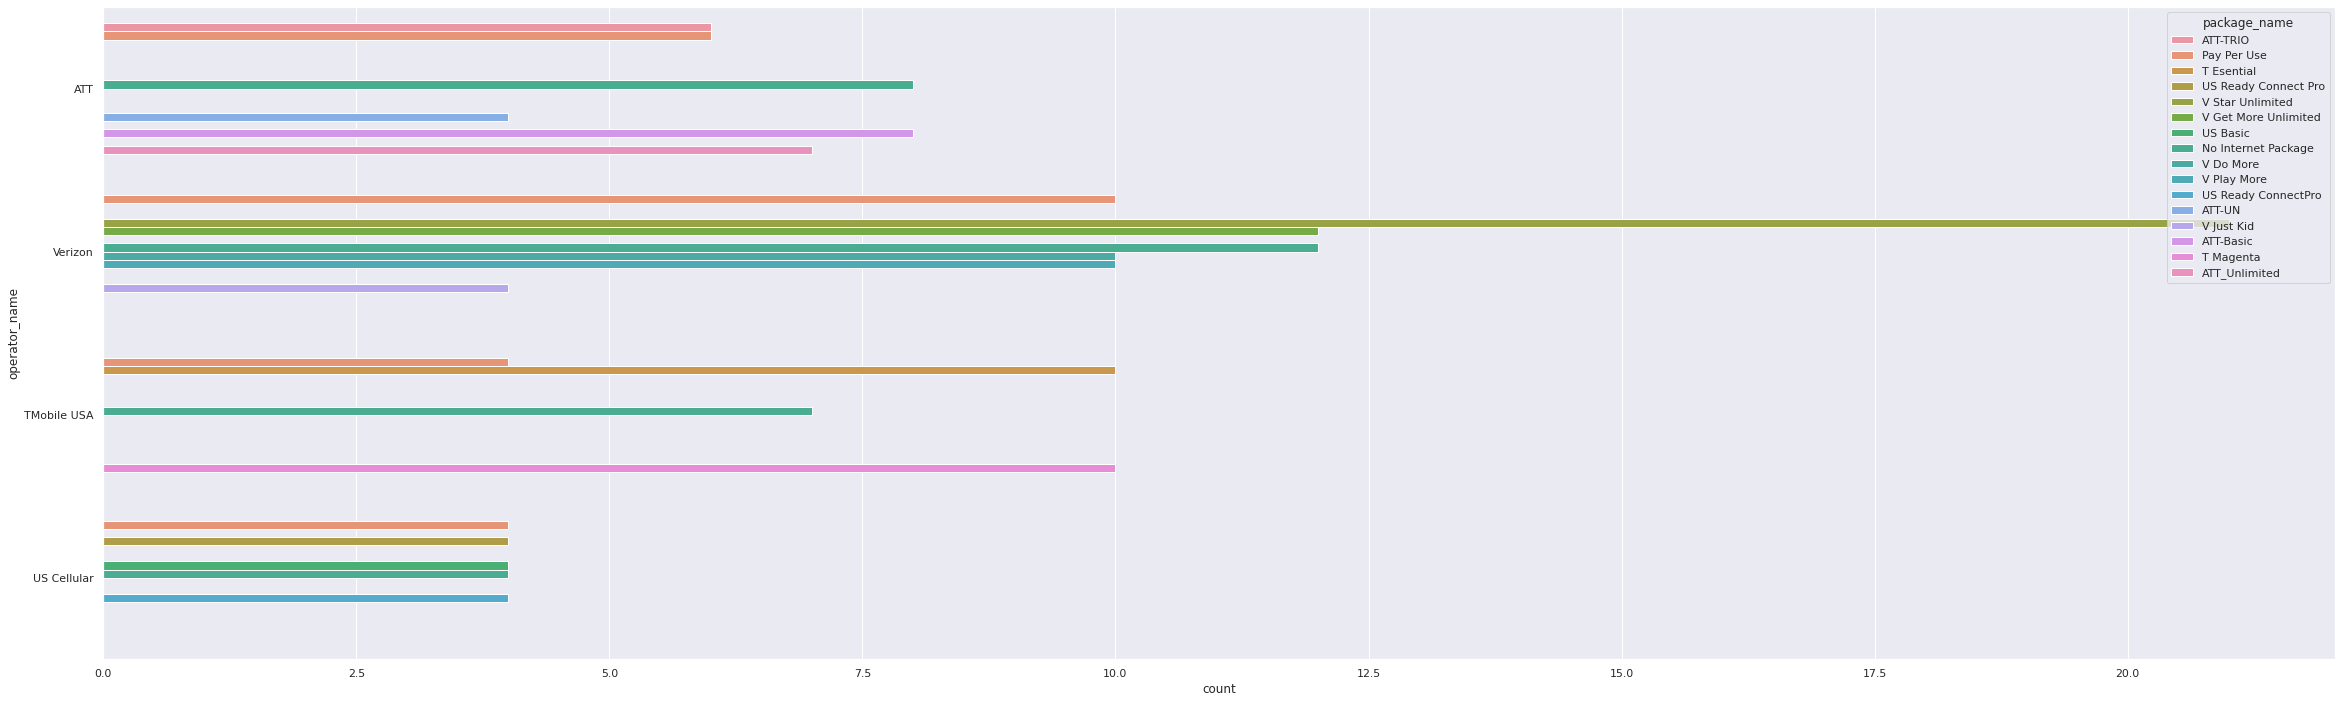

In [286]:
sns.countplot(y='operator_name', hue='package_name', data=df)

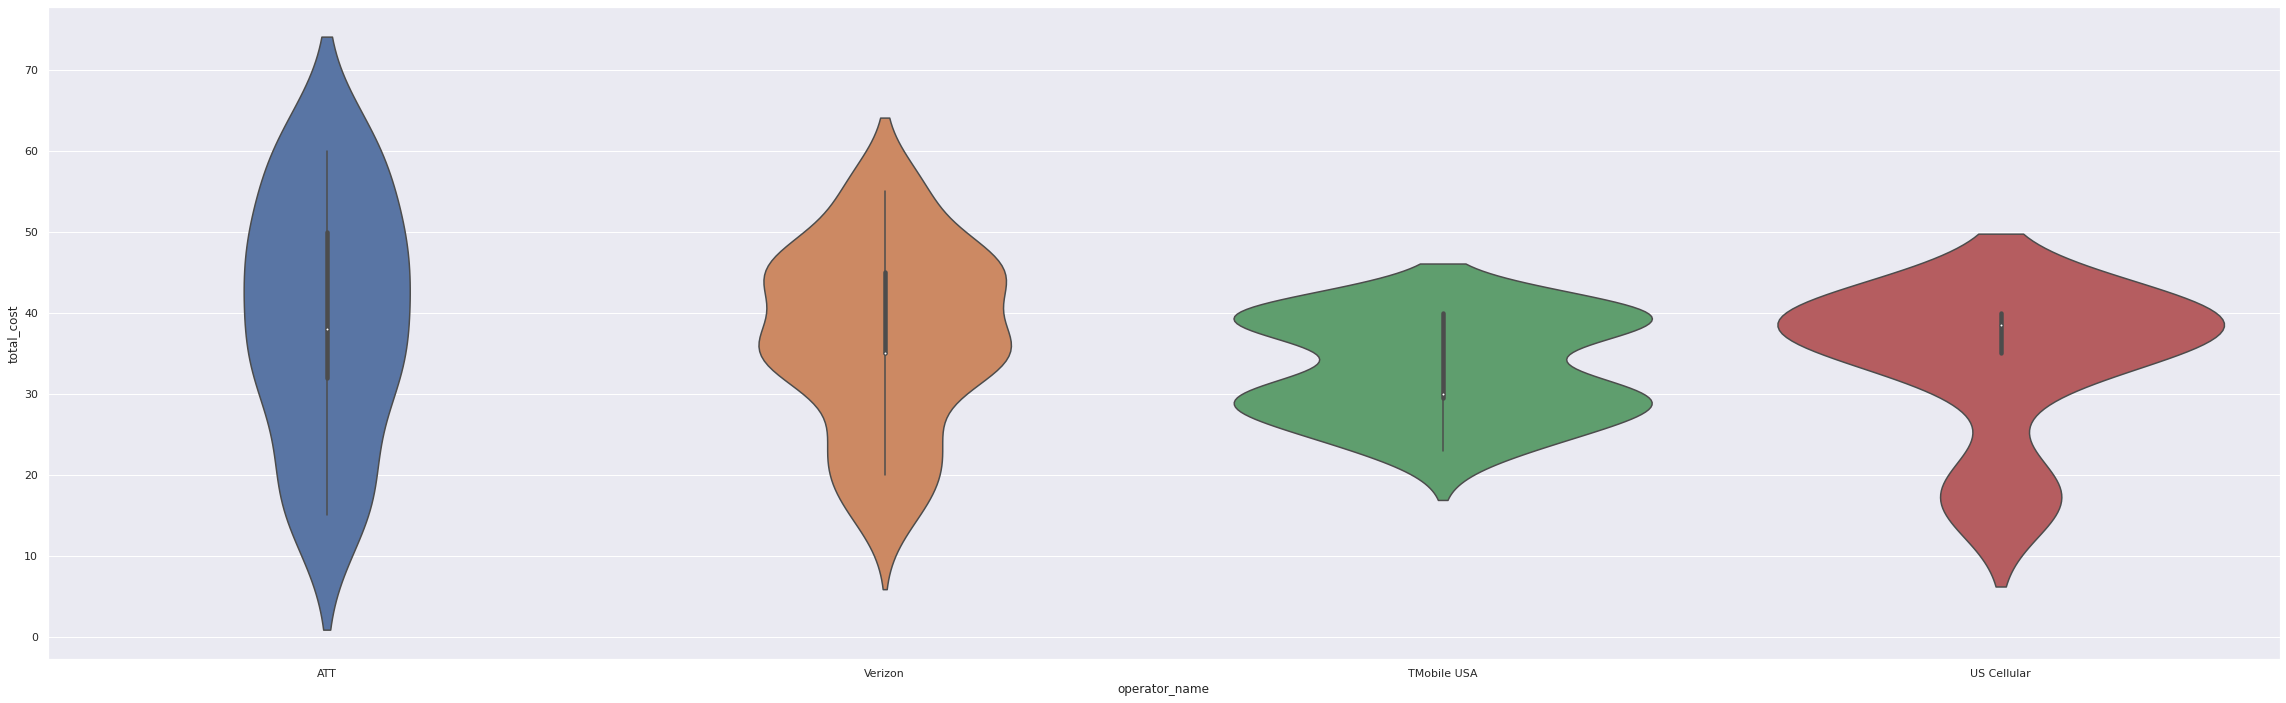

In [287]:
sns.violinplot(x="operator_name", y="total_cost", data=df)

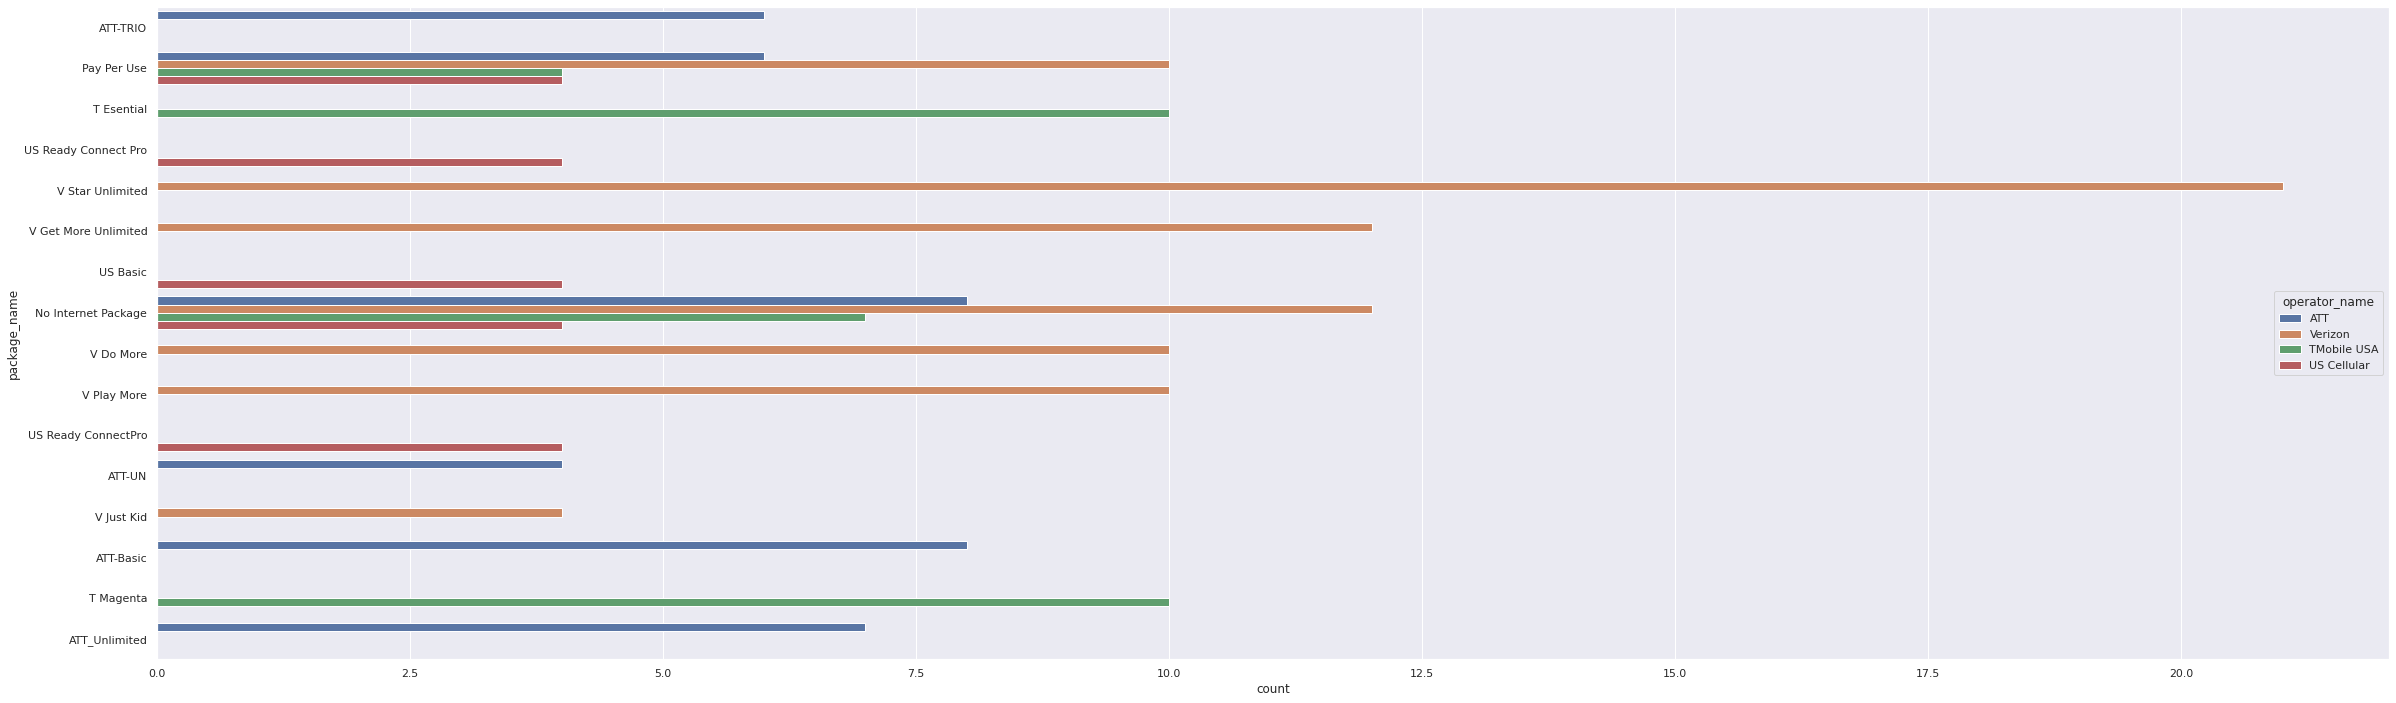

In [293]:
sns.countplot(y='package_name', hue='operator_name', data=df)

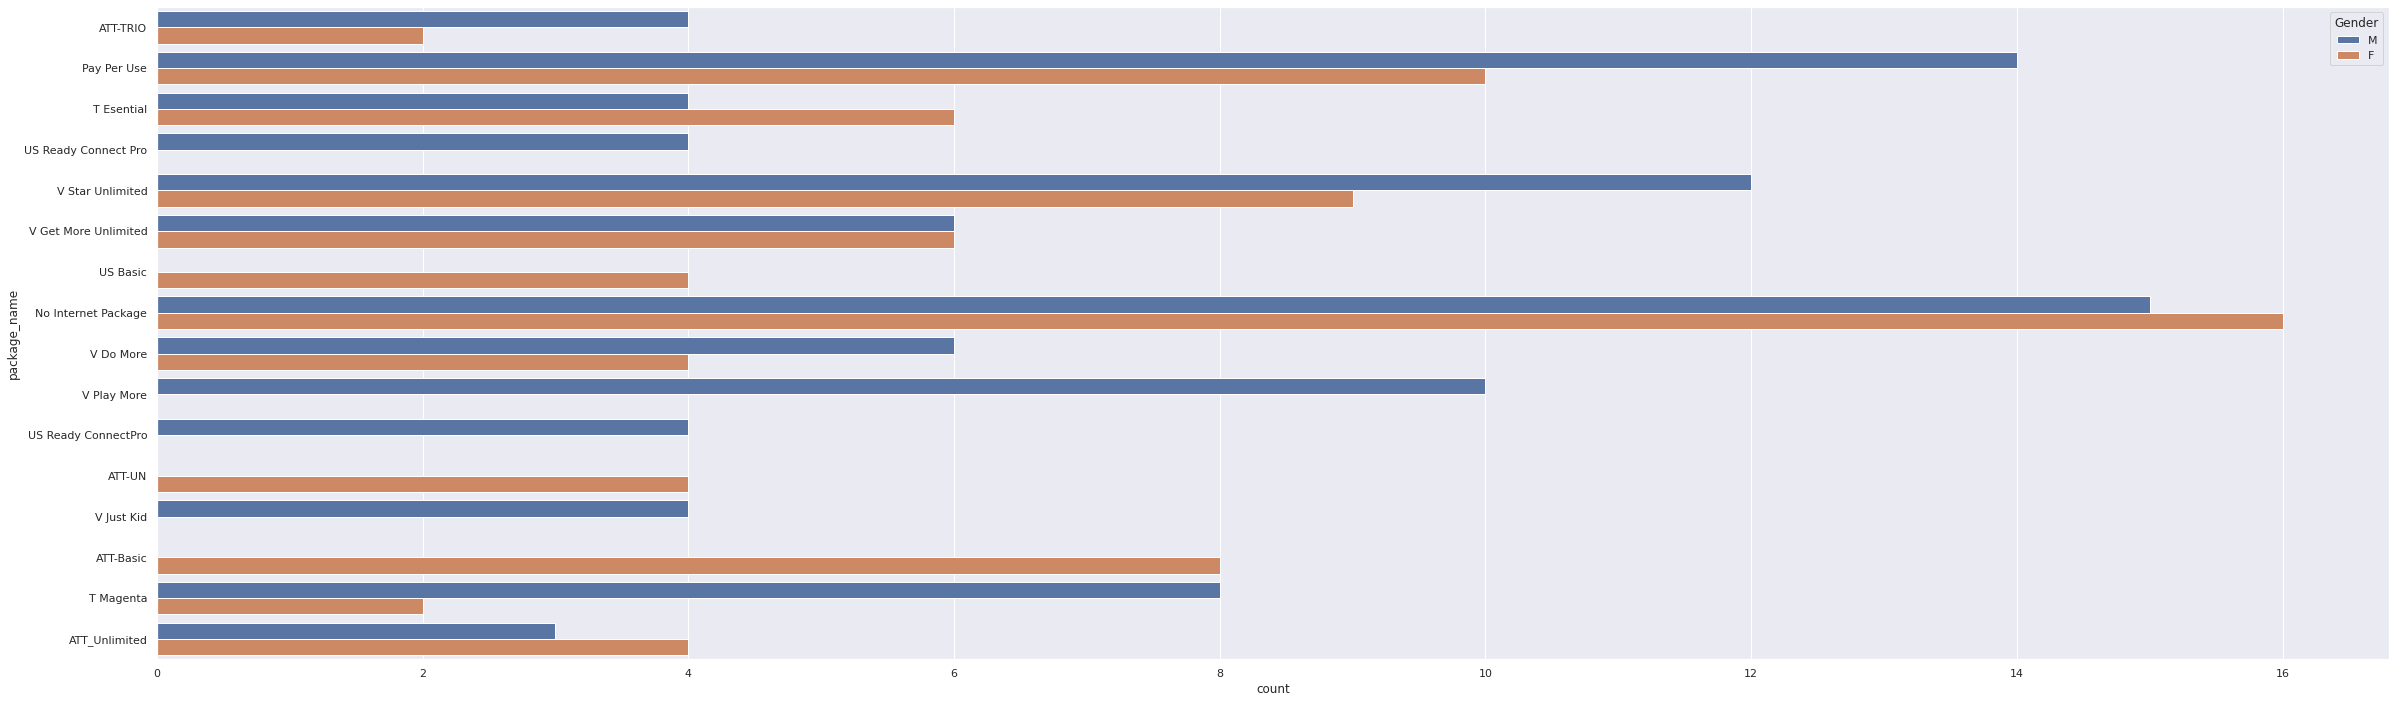

In [292]:
sns.countplot(y='package_name', hue='Gender', data=df)


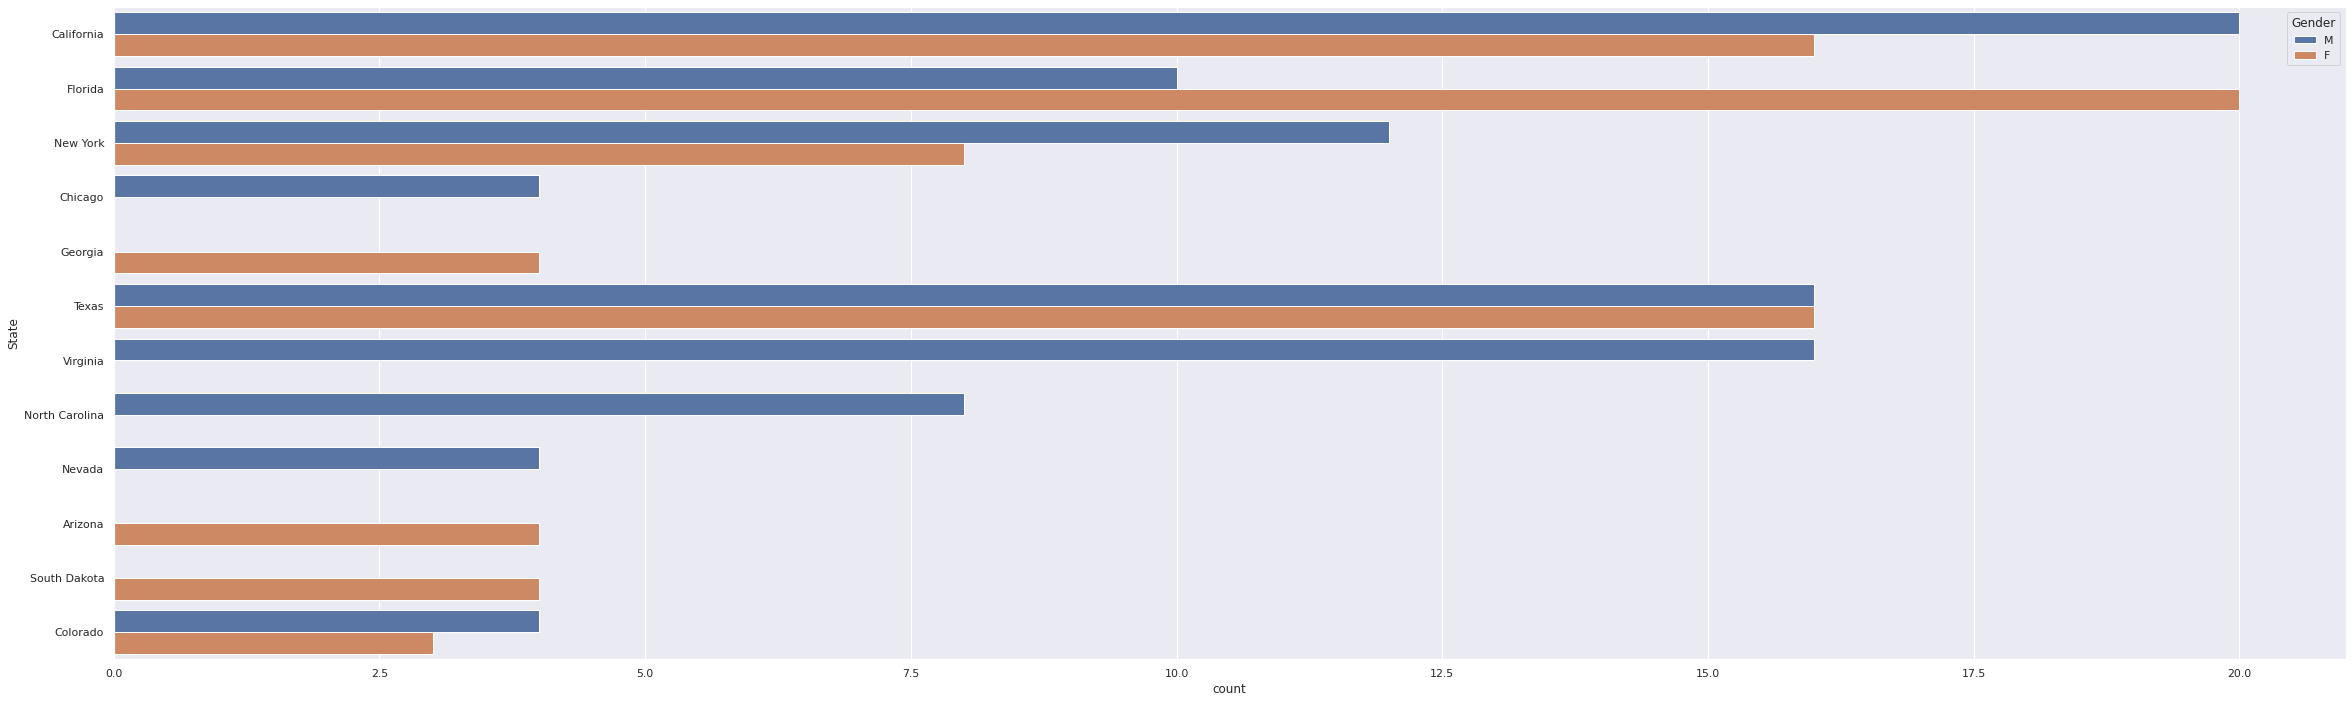

In [291]:
sns.countplot(y='State', hue='Gender', data=df)

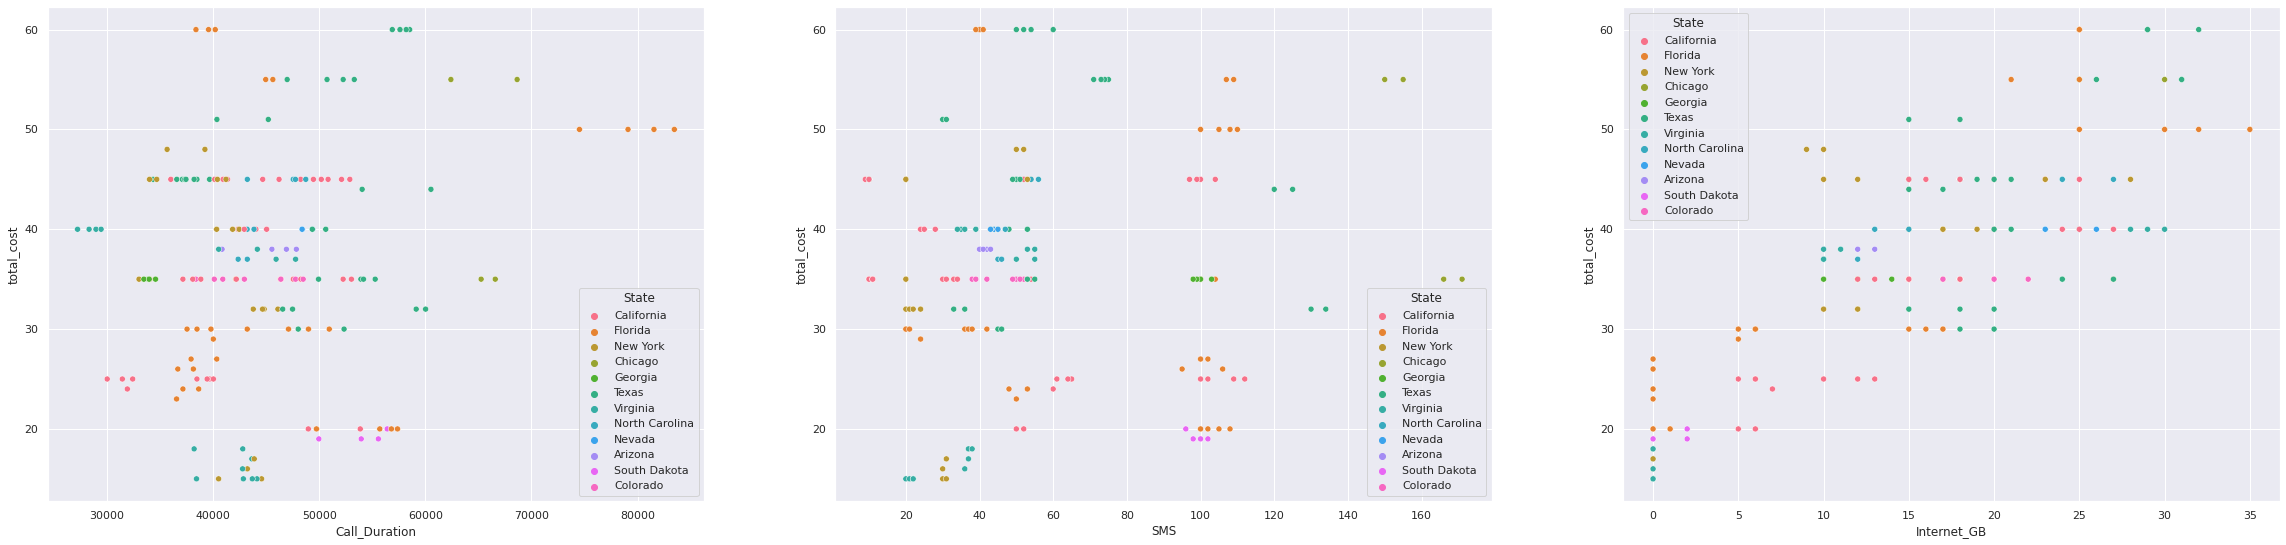

In [290]:
plt.figure(figsize = (40,20))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x="Call_Duration", y="total_cost", hue="State")
plt.subplot(2,3,2)
sns.scatterplot(data=df, x="SMS", y="total_cost", hue="State")
plt.subplot(2,3,3)
sns.scatterplot(data=df, x="Internet_GB", y="total_cost", hue="State")

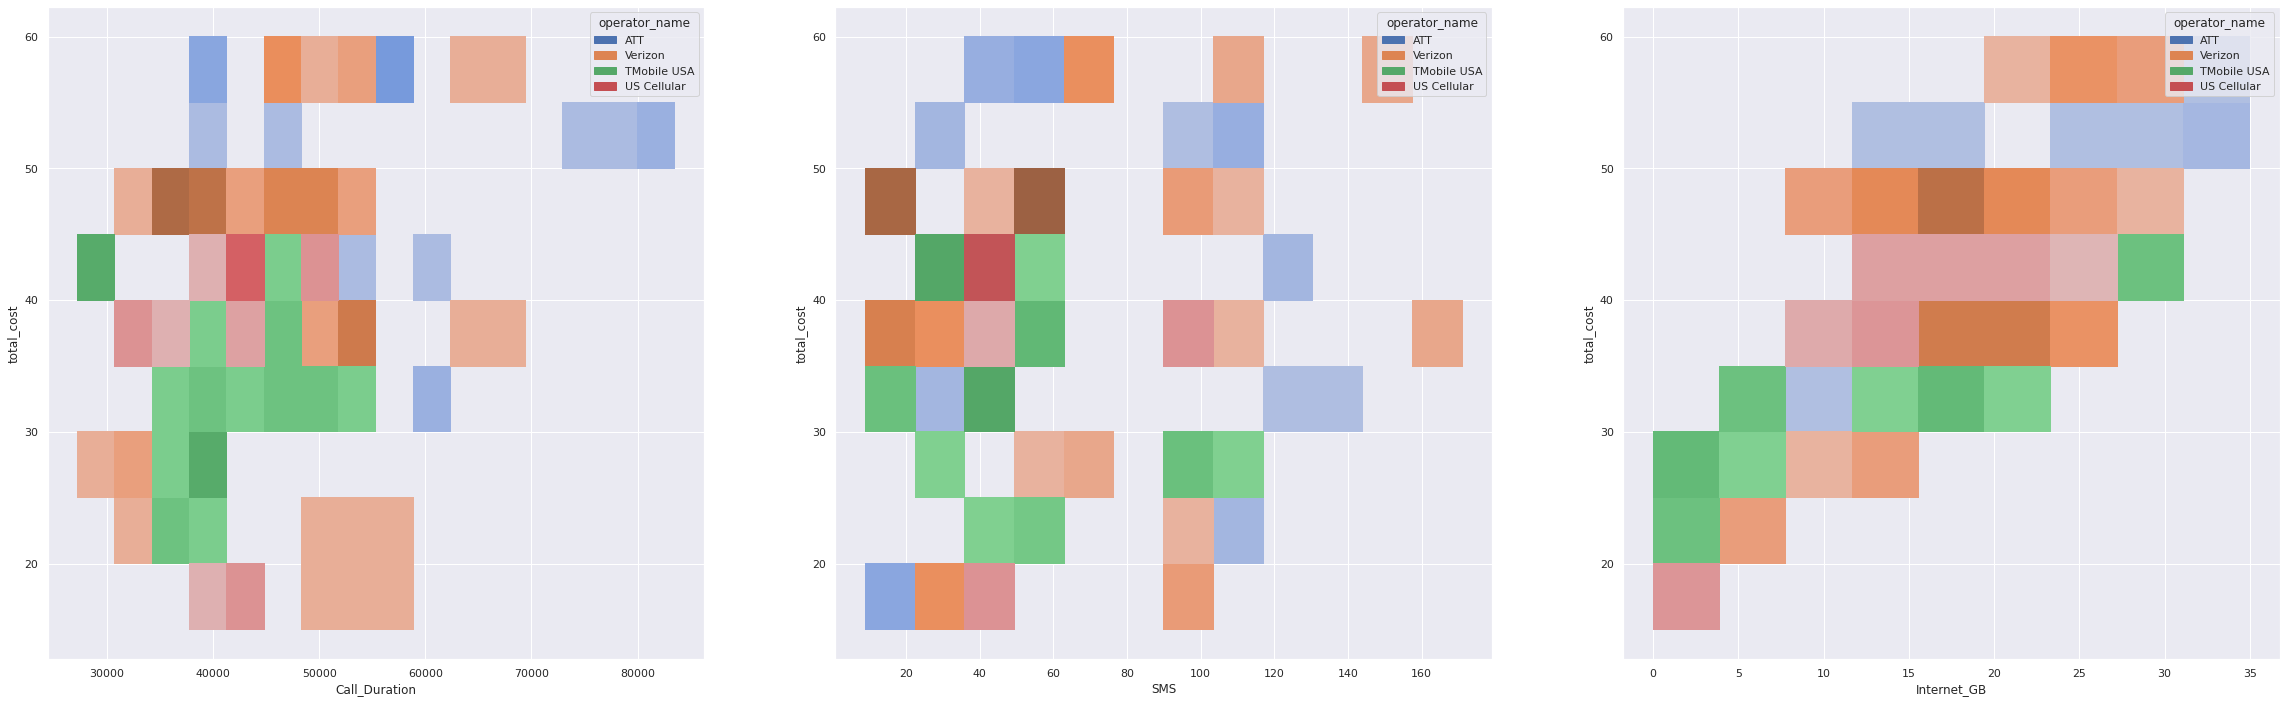

In [294]:
fig, axes = plt.subplots(1,3) #no of row 1 and col 3
sns.set(rc={'figure.figsize':(40,12)})
sns.histplot(data=df, x="Call_Duration", y="total_cost", hue="operator_name", ax = axes[0])
sns.histplot(data=df, x="SMS", y="total_cost", hue="operator_name", ax = axes[1])
sns.histplot(data=df, x="Internet_GB", y="total_cost", hue="operator_name", ax = axes[2])

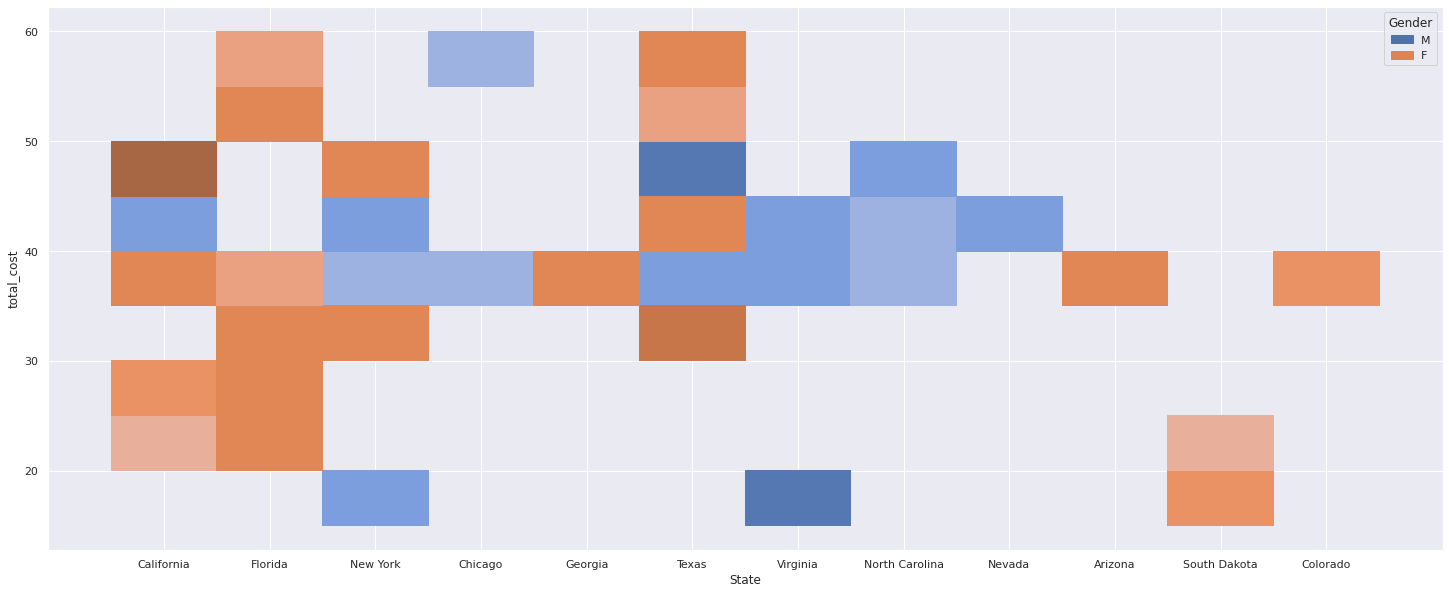

In [295]:
plt.figure(figsize = (25,10))
sns.histplot(data=df, x="State", y="total_cost", hue="Gender")

In [296]:
df.columns

Index(['customer_id', 'Customer_name', 'Gender', 'Country', 'State',
       'operator_name', 'Month', 'Call_Duration', 'SMS', 'Internet_GB',
       'OTT_service', 'package_name', 'SIM_state', 'total_cost'],
      dtype='object')

# **Market Basket Analysis based on Mobile Operators and 4G SIM**

In [297]:
# importing apriori for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [375]:
mask = df['SIM_state'] == '4G'
df_4G = pd.DataFrame(df[mask])
df_4G

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
0,D001,Bob,M,USA,California,ATT,February-22,36002,50.0,20.0,Netflix,ATT-TRIO,4G,45
1,D002,John,M,USA,California,Verizon,February-22,48965,50.0,5.0,Not Active,Pay Per Use,4G,20
2,D003,Patricia,F,USA,Florida,TMobile USA,February-22,43207,36.0,15.0,Netflix,T Esential,4G,30
3,D004,Alex,M,USA,New York,US Cellular,February-22,40320,45.0,15.0,Netflix,US Ready Connect Pro,4G,40
4,D005,Jennifer,F,USA,Florida,Verizon,February-22,42126,100.0,15.0,Netflix and Disney,V Star Unlimited,4G,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,D037,Alan,M,USA,Texas,Verizon,May-22,53294,73.0,26.0,Netflix and Amazon Prime,V Get More Unlimited,4G,55
164,D039,Alice,F,USA,Texas,ATT,May-22,47478,36.0,20.0,Netflix,ATT-Basic,4G,32
165,D040,Judy,F,USA,Texas,ATT,May-22,57605,60.0,32.0,Netflix and Amazon Prime,ATT_Unlimited,4G,60
167,D042,Laura,F,USA,Colorado,Verizon,May-22,40903,39.0,22.0,Netflix,V Star Unlimited,4G,35


In [376]:
basket=df_4G[['operator_name','package_name', 'OTT_service', 'State']]
basket

,operator_name,package_name,OTT_service,State
0,ATT,ATT-TRIO,Netflix,California
1,Verizon,Pay Per Use,Not Active,California
2,TMobile USA,T Esential,Netflix,Florida
3,US Cellular,US Ready Connect Pro,Netflix,New York
4,Verizon,V Star Unlimited,Netflix and Disney,Florida
...,...,...,...,...
162,Verizon,V Get More Unlimited,Netflix and Amazon Prime,Texas
164,ATT,ATT-Basic,Netflix,Texas
165,ATT,ATT_Unlimited,Netflix and Amazon Prime,Texas
167,Verizon,V Star Unlimited,Netflix,Colorado


In [377]:
basket_sets=pd.get_dummies(basket)
basket_sets

,operator_name_ATT,operator_name_TMobile USA,operator_name_US Cellular,operator_name_Verizon,package_name_ATT-Basic,package_name_ATT-TRIO,package_name_ATT-UN,package_name_ATT_Unlimited,package_name_Pay Per Use,package_name_T Esential,...,State_California,State_Chicago,State_Colorado,State_Florida,State_Georgia,State_Nevada,State_New York,State_North Carolina,State_Texas,State_Virginia
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
164,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
165,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
167,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [378]:
frequent_itemsets = apriori (basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.224638,(operator_name_ATT)
1,0.173913,(operator_name_TMobile USA)
2,0.115942,(operator_name_US Cellular)
3,0.485507,(operator_name_Verizon)
4,0.173913,(package_name_Pay Per Use)
5,0.072464,(package_name_T Esential)
6,0.072464,(package_name_T Magenta)
7,0.072464,(package_name_V Do More)
8,0.086957,(package_name_V Get More Unlimited)
9,0.072464,(package_name_V Play More)


In [379]:
from mlxtend.frequent_patterns import association_rules
res=association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(package_name_T Esential),(operator_name_TMobile USA),0.072464,0.173913,0.072464,1.000000,5.750000,0.059861,inf
1,(package_name_T Magenta),(operator_name_TMobile USA),0.072464,0.173913,0.072464,1.000000,5.750000,0.059861,inf
2,(package_name_V Do More),(operator_name_Verizon),0.072464,0.485507,0.072464,1.000000,2.059701,0.037282,inf
3,(package_name_V Get More Unlimited),(operator_name_Verizon),0.086957,0.485507,0.086957,1.000000,2.059701,0.044739,inf
4,(package_name_V Play More),(operator_name_Verizon),0.072464,0.485507,0.072464,1.000000,2.059701,0.037282,inf
5,(package_name_V Star Unlimited),(operator_name_Verizon),0.152174,0.485507,0.152174,1.000000,2.059701,0.078292,inf
6,(OTT_service_Netflix and Disney),(operator_name_Verizon),0.072464,0.485507,0.072464,1.000000,2.059701,0.037282,inf
7,(State_California),(operator_name_Verizon),0.231884,0.485507,0.173913,0.750000,1.544776,0.061332,2.057971
8,(OTT_service_Netflix and Disney),(package_name_V Star Unlimited),0.072464,0.152174,0.072464,1.000000,6.571429,0.061437,inf
9,"(operator_name_Verizon, OTT_service_Netflix)",(package_name_V Star Unlimited),0.108696,0.152174,0.079710,0.733333,4.819048,0.063170,3.179348


In [380]:
res.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [381]:
res1=res[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
res1=res1[res1['confidence'] >=1]
res1.sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
8,(OTT_service_Netflix and Disney),(package_name_V Star Unlimited),0.072464,1.0,6.571429
11,"(operator_name_Verizon, OTT_service_Netflix an...",(package_name_V Star Unlimited),0.072464,1.0,6.571429
13,(OTT_service_Netflix and Disney),"(operator_name_Verizon, package_name_V Star Un...",0.072464,1.0,6.571429
0,(package_name_T Esential),(operator_name_TMobile USA),0.072464,1.0,5.750000
1,(package_name_T Magenta),(operator_name_TMobile USA),0.072464,1.0,5.750000
2,(package_name_V Do More),(operator_name_Verizon),0.072464,1.0,2.059701
3,(package_name_V Get More Unlimited),(operator_name_Verizon),0.086957,1.0,2.059701
4,(package_name_V Play More),(operator_name_Verizon),0.072464,1.0,2.059701
5,(package_name_V Star Unlimited),(operator_name_Verizon),0.152174,1.0,2.059701
6,(OTT_service_Netflix and Disney),(operator_name_Verizon),0.072464,1.0,2.059701


# **Market Basket Analysis based on Mobile Operators and 3G SIM**

In [360]:
mask = df['SIM_state'] == '3G'
df_3G = pd.DataFrame(df[mask])
df_3G

,customer_id,Customer_name,Gender,Country,State,operator_name,Month,Call_Duration,SMS,Internet_GB,OTT_service,package_name,SIM_state,total_cost
8,D009,Steven,M,USA,New York,Verizon,February-22,40506,30.0,0.0,unavailable,No Internet Package,3G,15
12,D013,Justin,M,USA,Virginia,ATT,February-22,38423,20.0,0.0,unavailable,No Internet Package,3G,15
23,D024,Ruth,F,USA,South Dakota,Verizon,February-22,49955,100.0,0.0,unavailable,No Internet Package,3G,19
24,D025,Bruce,M,USA,Virginia,US Cellular,February-22,38200,37.0,0.0,unavailable,No Internet Package,3G,18
27,D028,Megan,F,USA,Florida,TMobile USA,February-22,40333,100.0,0.0,unavailable,No Internet Package,3G,27
35,D036,Sara,F,USA,Florida,ATT,February-22,49733,100.0,0.0,unavailable,No Internet Package,3G,20
37,D038,Jean,F,USA,California,Verizon,February-22,30006,65.0,5.0,unavailable,No Internet Package,3G,25
48,D009,Steven,M,USA,New York,Verizon,March-22,44557,31.0,0.0,unavailable,No Internet Package,3G,15
52,D013,Justin,M,USA,Virginia,ATT,March-22,42842,21.0,0.0,unavailable,No Internet Package,3G,15
63,D024,Ruth,F,USA,South Dakota,Verizon,March-22,53951,102.0,0.0,unavailable,No Internet Package,3G,19


In [369]:
basket=df_3G[['operator_name','State']]
basket

,operator_name,State
8,Verizon,New York
12,ATT,Virginia
23,Verizon,South Dakota
24,US Cellular,Virginia
27,TMobile USA,Florida
35,ATT,Florida
37,Verizon,California
48,Verizon,New York
52,ATT,Virginia
63,Verizon,South Dakota


In [370]:
basket_sets=pd.get_dummies(basket)
basket_sets

,operator_name_ATT,operator_name_TMobile USA,operator_name_US Cellular,operator_name_Verizon,State_California,State_Florida,State_New York,State_South Dakota,State_Virginia
8,0,0,0,1,0,0,1,0,0
12,1,0,0,0,0,0,0,0,1
23,0,0,0,1,0,0,0,1,0
24,0,0,1,0,0,0,0,0,1
27,0,1,0,0,0,1,0,0,0
35,1,0,0,0,0,1,0,0,0
37,0,0,0,1,1,0,0,0,0
48,0,0,0,1,0,0,1,0,0
52,1,0,0,0,0,0,0,0,1
63,0,0,0,1,0,0,0,1,0


In [371]:
frequent_itemsets = apriori (basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.258065,(operator_name_ATT)
1,0.225806,(operator_name_TMobile USA)
2,0.129032,(operator_name_US Cellular)
3,0.387097,(operator_name_Verizon)
4,0.129032,(State_California)
5,0.354839,(State_Florida)
6,0.129032,(State_New York)
7,0.129032,(State_South Dakota)
8,0.258065,(State_Virginia)
9,0.129032,"(operator_name_ATT, State_Florida)"


In [372]:
from mlxtend.frequent_patterns import association_rules
res=association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(operator_name_TMobile USA),(State_Florida),0.225806,0.354839,0.225806,1.0,2.818182,0.145682,inf
1,(operator_name_US Cellular),(State_Virginia),0.129032,0.258065,0.129032,1.0,3.875000,0.095734,inf
2,(State_California),(operator_name_Verizon),0.129032,0.387097,0.129032,1.0,2.583333,0.079084,inf
3,(State_New York),(operator_name_Verizon),0.129032,0.387097,0.129032,1.0,2.583333,0.079084,inf
4,(State_South Dakota),(operator_name_Verizon),0.129032,0.387097,0.129032,1.0,2.583333,0.079084,inf


In [373]:
res.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [374]:
res1=res[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
res1=res1[res1['confidence'] >=1]
res1.sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
1,(operator_name_US Cellular),(State_Virginia),0.129032,1.0,3.875000
0,(operator_name_TMobile USA),(State_Florida),0.225806,1.0,2.818182
2,(State_California),(operator_name_Verizon),0.129032,1.0,2.583333
3,(State_New York),(operator_name_Verizon),0.129032,1.0,2.583333
4,(State_South Dakota),(operator_name_Verizon),0.129032,1.0,2.583333
